A princípio, o dataset utilizado foi o **EuroSat Dataset**, podendo ser verificado no seguinte link: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

Foram selecionadas um total de 10 imagens **com baixo contraste** que necessitavam de um processamento digital para uma respectiva melhoria a nível visual.

In [17]:
!pip install opencv-python
!python -m pip install -U scikit-image


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Image
from skimage import io
from skimage.exposure import match_histograms
from matplotlib.image import imsave

In [19]:
images = []
image_path = 'C:\\Users\\Caio\\AtividadePDI'

for i in range(1, 11):
    file_path = os.path.join(image_path, f"AnnualCrop_{i}.jpg")
    image = cv2.imread(file_path)
    if image is not None:
        images.append(image)
    else:
        print(f"Failed to load: AnnualCrop_{i}.jpg")

Com as imagens devidamente armazenadas, é necessário realizar o que se solicita na atividade:

1. Dada uma imagem de satélite com baixa visibilidade, aplicar equalização de histograma
para realce de contraste;
2. Aplicar especificação de histograma para adequar o estilo tonal de uma imagem a uma
referência (por exemplo, uma imagem capturada em dia ensolarado);
3. Exibir e comparar os histogramas antes e depois do processamento;
4. Aplicar as técnicas apenas em determinadas regiões da imagem, como áreas agrícolas, usando
uma máscara

Para satisfazer o que é proposto no item 1, serão utilizadas as imagens 1, 2 e 3.

Porém, note que as imagens são coloridas, ou seja, é necessário fazer os seguintes procedimentos:
-Transformar as imagens para o espaço de cores HSV.
-Realizar a equalização de histograma apenas no canal V (Valor).
-Transformar as imagens de volta para o espaço de cores RGB.

In [20]:
#Carregar as imagens
img1 = cv2.imread('C:\\Users\\Caio\\AtividadePDI\\AnnualCrop_1.jpg')
img2 = cv2.imread('C:\\Users\\Caio\\AtividadePDI\\AnnualCrop_2.jpg')
img3 = cv2.imread('C:\\Users\\Caio\\AtividadePDI\\AnnualCrop_3.jpg')

In [21]:
# Converter para o espaço de cores HSV
hsv_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
hsv_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
hsv_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)

In [22]:
# Dividir os canais HSV
h1, s1, v1 = cv2.split(hsv_img1)
h2, s2, v2 = cv2.split(hsv_img2)
h3, s3, v3 = cv2.split(hsv_img3)

Agora, é necessário equalizar somente o canal **v**.

In [23]:
# Equalizar o canal V (valor)
v1_equalized = cv2.equalizeHist(v1)
v2_equalized = cv2.equalizeHist(v2)
v3_equalized = cv2.equalizeHist(v3)

In [24]:
# Mesclar os canais HSV de volta, com o canal V equalizado
hsv_img1 = cv2.merge([h1, s1, v1_equalized])
hsv_img2 = cv2.merge([h2, s2, v2_equalized])
hsv_img3 = cv2.merge([h3, s3, v3_equalized])


In [25]:
# Converter de volta para o espaço de cores RGB
img1_equalized = cv2.cvtColor(hsv_img1, cv2.COLOR_HSV2RGB)
img2_equalized = cv2.cvtColor(hsv_img2, cv2.COLOR_HSV2RGB)
img3_equalized = cv2.cvtColor(hsv_img3, cv2.COLOR_HSV2RGB)

Essa parte do código exibe as imagens equalizadas

In [27]:
imsave('img1_equalized.png', img1_equalized)
imsave('img2_equalized.png', img2_equalized)
imsave('img3_equalized.png', img3_equalized)

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 12))

# Exibe a primeira imagem
axs[0, 0].imshow(img1)
axs[0, 0].set_title('Imagem 1')
axs[0, 0].axis('off')

axs[0, 1].imshow(img1_equalized)
axs[0, 1].set_title('Equalizada 1')
axs[0, 1].axis('off')

# Exibe a segunda imagem
axs[1, 0].imshow(img2) 
axs[1, 0].set_title('Imagem 2')
axs[1, 0].axis('off')

axs[1, 1].imshow(img2_equalized)
axs[1, 1].set_title('Equalizada 2')
axs[1, 1].axis('off')

# Exibe a terceira imagem
axs[2, 0].imshow(img3) 
axs[2, 0].set_title('Imagem 3')
axs[2, 0].axis('off')

axs[2, 1].imshow(img3_equalized)
axs[2, 1].set_title('Equalizada 3')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

Essa outra parte exibe os histogramas das imagens (original e equalizado)

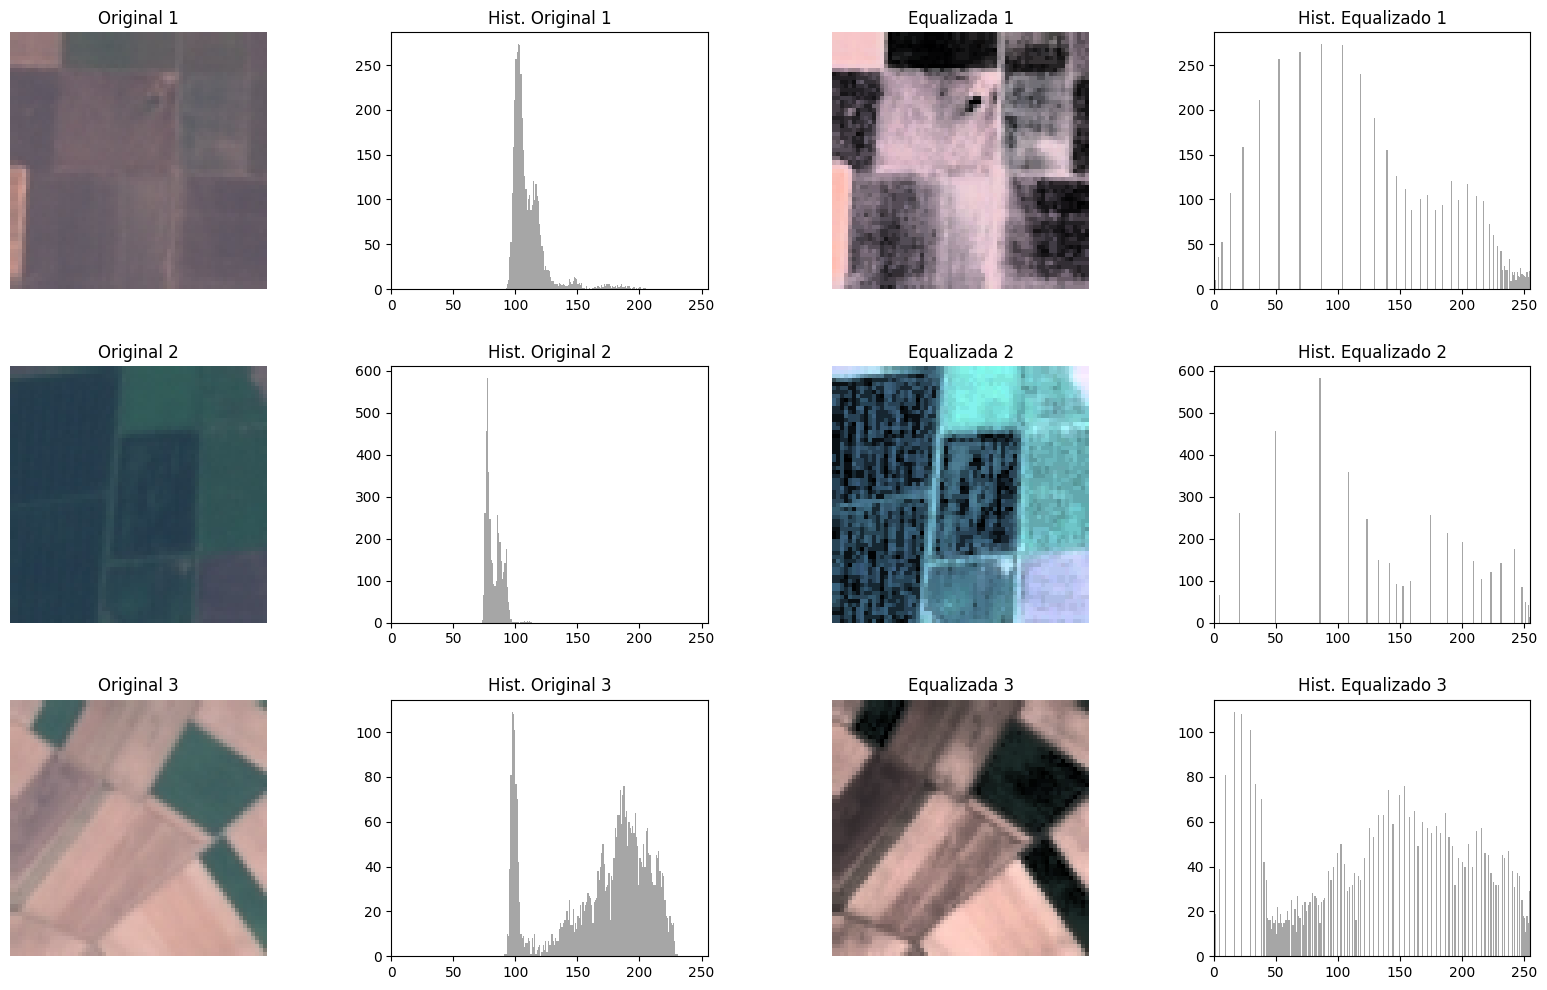

In [29]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Função para plotar e salvar histograma do canal V
def plot_histogram(v_channel, ax, title, filename):
    ax.hist(v_channel.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    ax.set_title(title)
    ax.set_xlim(0, 255)
    
    # Criar uma figura separada para salvar o histograma isolado
    fig_hist = plt.figure()
    plt.hist(v_channel.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    plt.title(title)
    plt.xlim(0, 255)
    plt.savefig(filename)
    plt.close(fig_hist)

# Processamento para cada imagem
for i in range(3):
    # --- Imagem Original ---
    original_bgr = locals()[f'img{i+1}']
    original_rgb = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB)
    hsv_original = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2HSV)
    v_original = hsv_original[:, :, 2]

    # Exibe imagem original
    axs[i, 0].imshow(original_rgb)
    axs[i, 0].set_title(f'Original {i+1}')
    axs[i, 0].axis('off')

    # Histograma original (na grid + salvo)
    plot_histogram(v_original, axs[i, 1], f'Hist. Original {i+1}', f'hist_original_{i+1}.png')

    # --- Imagem Equalizada ---
    v_equalized = locals()[f'hsv_img{i+1}'][:, :, 2]
    equalized_rgb = locals()[f'img{i+1}_equalized']

    # Exibe imagem equalizada
    axs[i, 2].imshow(equalized_rgb)
    axs[i, 2].set_title(f'Equalizada {i+1}')
    axs[i, 2].axis('off')

    # Histograma equalizado (na grid + salvo)
    plot_histogram(v_equalized, axs[i, 3], f'Hist. Equalizado {i+1}', f'hist_equalizado_{i+1}.png')

plt.savefig('grid_completo.png')  # Salva o grid inteiro, se quiser
plt.show()


Agora, é necessário realizar o seguinte procedimento:
    -Aplicar **especificação de histograma** para adequar o estilo tonal de uma imagem a uma referência (por exemplo, uma imagem capturada      em dia ensolarado)

A imgem utilizada como referência para o processo de especificação será:

In [ ]:
Image("maxresdefault.jpg", width=300)

O respectivo histograma da imagem:

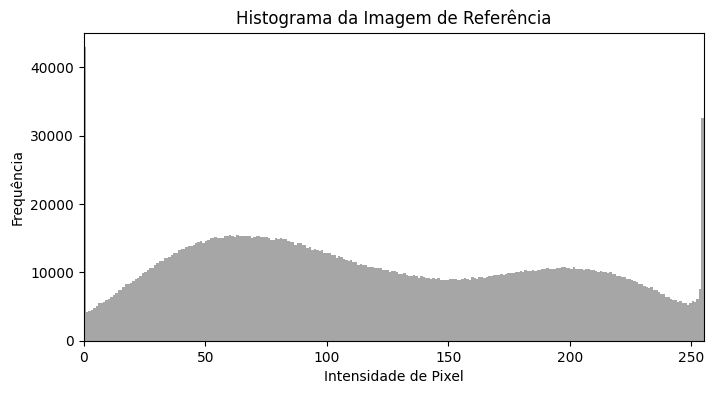

In [36]:
# Leitura da imagem de referência
image = cv2.imread("maxresdefault.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plotando e salvando o histograma tradicional
plt.figure(figsize=(8, 4))
plt.hist(image_rgb.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Histograma da Imagem de Referência')
plt.xlim([0, 255])
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Frequência')

# Salva o histograma no diretório atual
plt.savefig("histograma_referencia.png")

plt.show()


Agora, o processo de especificação de histograma será feito.

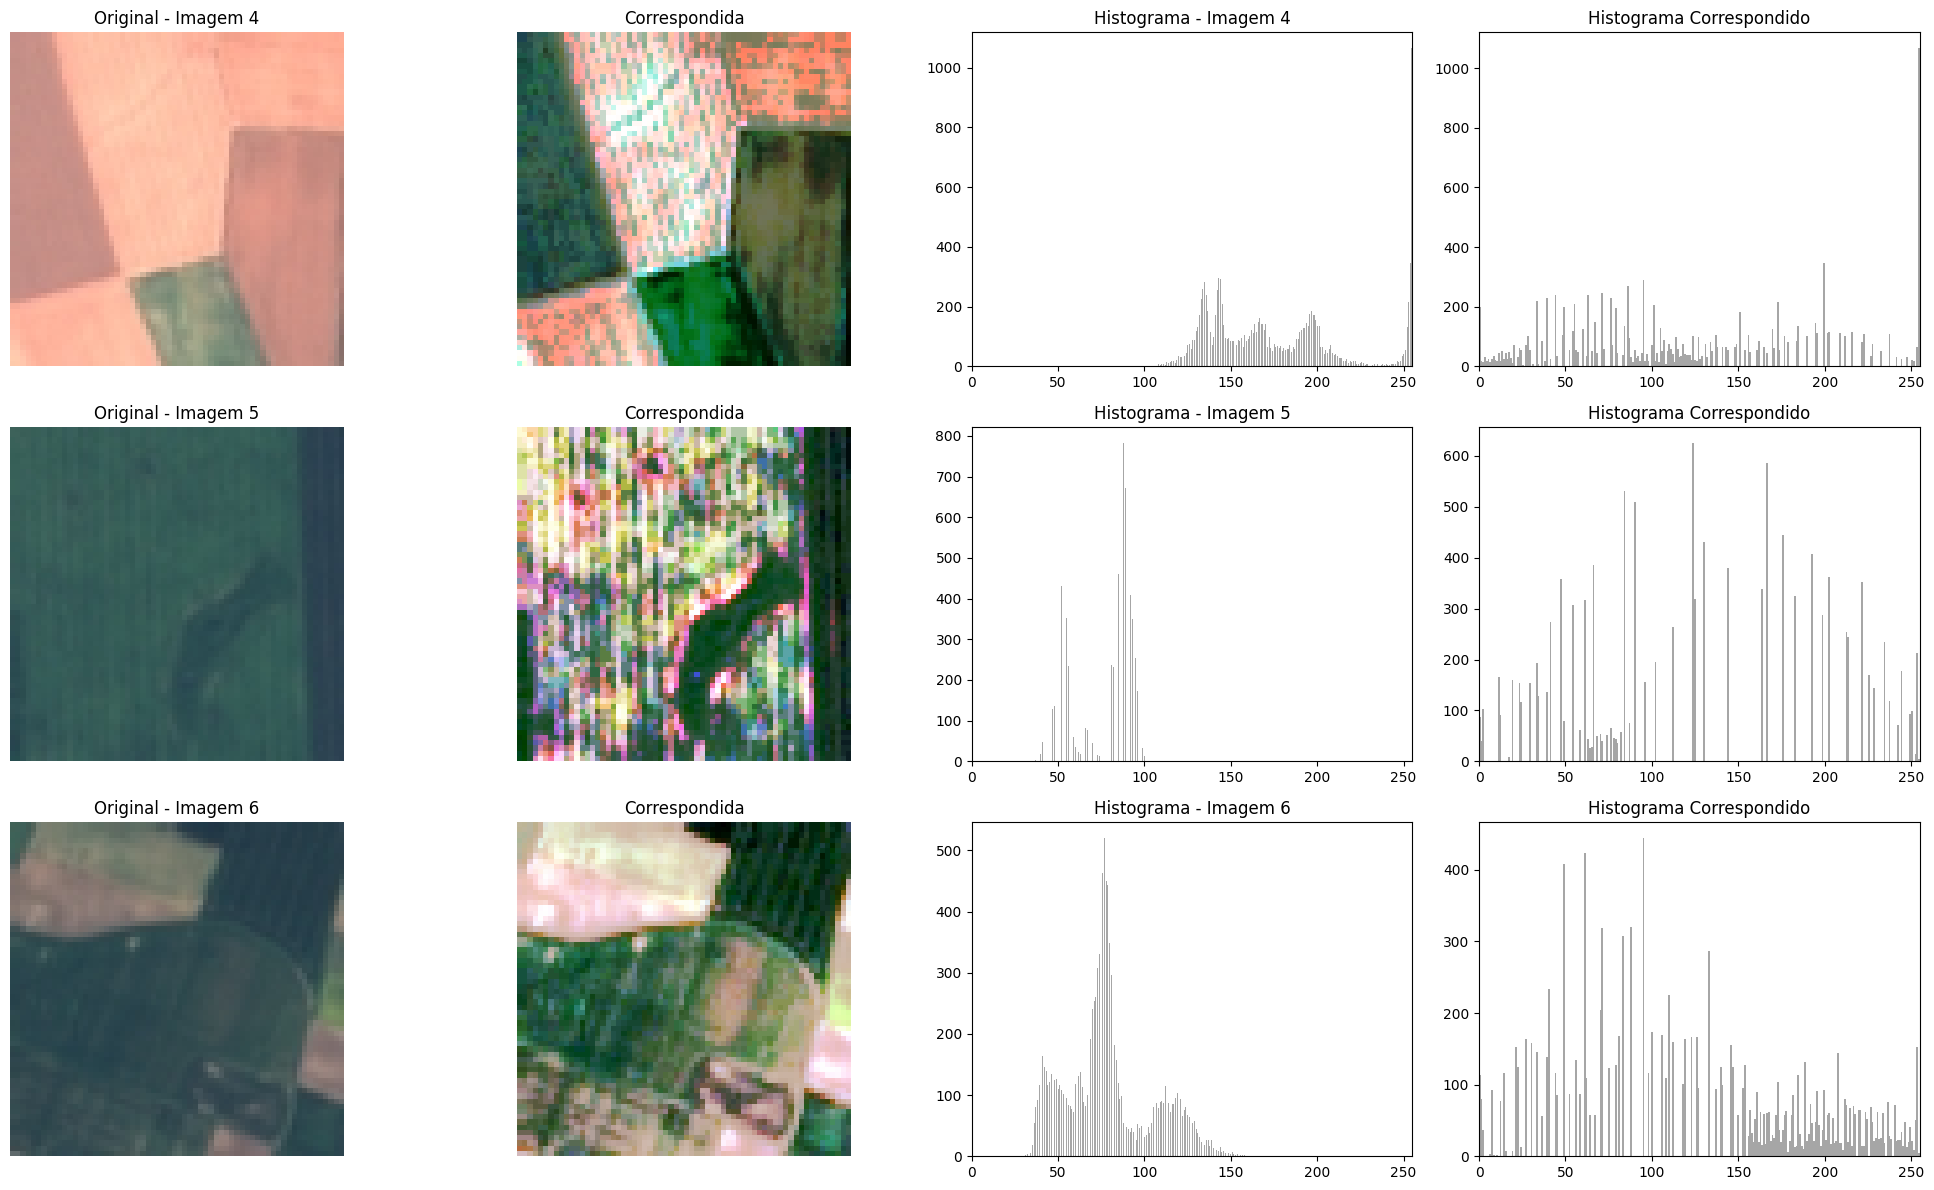

In [32]:
from skimage import io
from skimage.exposure import match_histograms
from matplotlib import pyplot as plt

# Leitura das imagens originais
image4 = io.imread("C:/Users/Caio/AtividadePDI/AnnualCrop_4.jpg")
image5 = io.imread("C:/Users/Caio/AtividadePDI/AnnualCrop_5.jpg") 
image6 = io.imread("C:/Users/Caio/AtividadePDI/AnnualCrop_6.jpg") 

# Leitura da imagem de referência
reference = io.imread("maxresdefault.jpg")

# Aplicação da correspondência de histograma
matched4 = match_histograms(image4, reference, channel_axis=-1)
matched5 = match_histograms(image5, reference, channel_axis=-1) 
matched6 = match_histograms(image6, reference, channel_axis=-1) 

# Listas para iteração
originals = [image4, image5, image6]
matched = [matched4, matched5, matched6]
titles = ['Imagem 4', 'Imagem 5', 'Imagem 6']

# Criação de um único grid (3 linhas x 4 colunas)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(3):
    # Imagem original
    axes[i, 0].imshow(originals[i])
    axes[i, 0].set_title(f'Original - {titles[i]}')
    axes[i, 0].axis('off')

    # Imagem correspondida
    axes[i, 1].imshow(matched[i])
    axes[i, 1].set_title('Correspondida')
    axes[i, 1].axis('off')

    # Histograma original
    axes[i, 2].hist(originals[i].ravel(), bins=256, color='gray', alpha=0.7)
    axes[i, 2].set_title(f'Histograma - {titles[i]}')
    axes[i, 2].set_xlim([0, 255])

    # Histograma correspondido
    axes[i, 3].hist(matched[i].ravel(), bins=256, color='gray', alpha=0.7)
    axes[i, 3].set_title('Histograma Correspondido')
    axes[i, 3].set_xlim([0, 255])

# Salva o grid completo no diretório atual
plt.tight_layout()
plt.savefig("grid_completo_correspondencia.png")

plt.show()


Agora, será feito o uso de uma **máscara** para melhorar o contraste de regiões específicas das imagens **7, 8, 9, 10.**

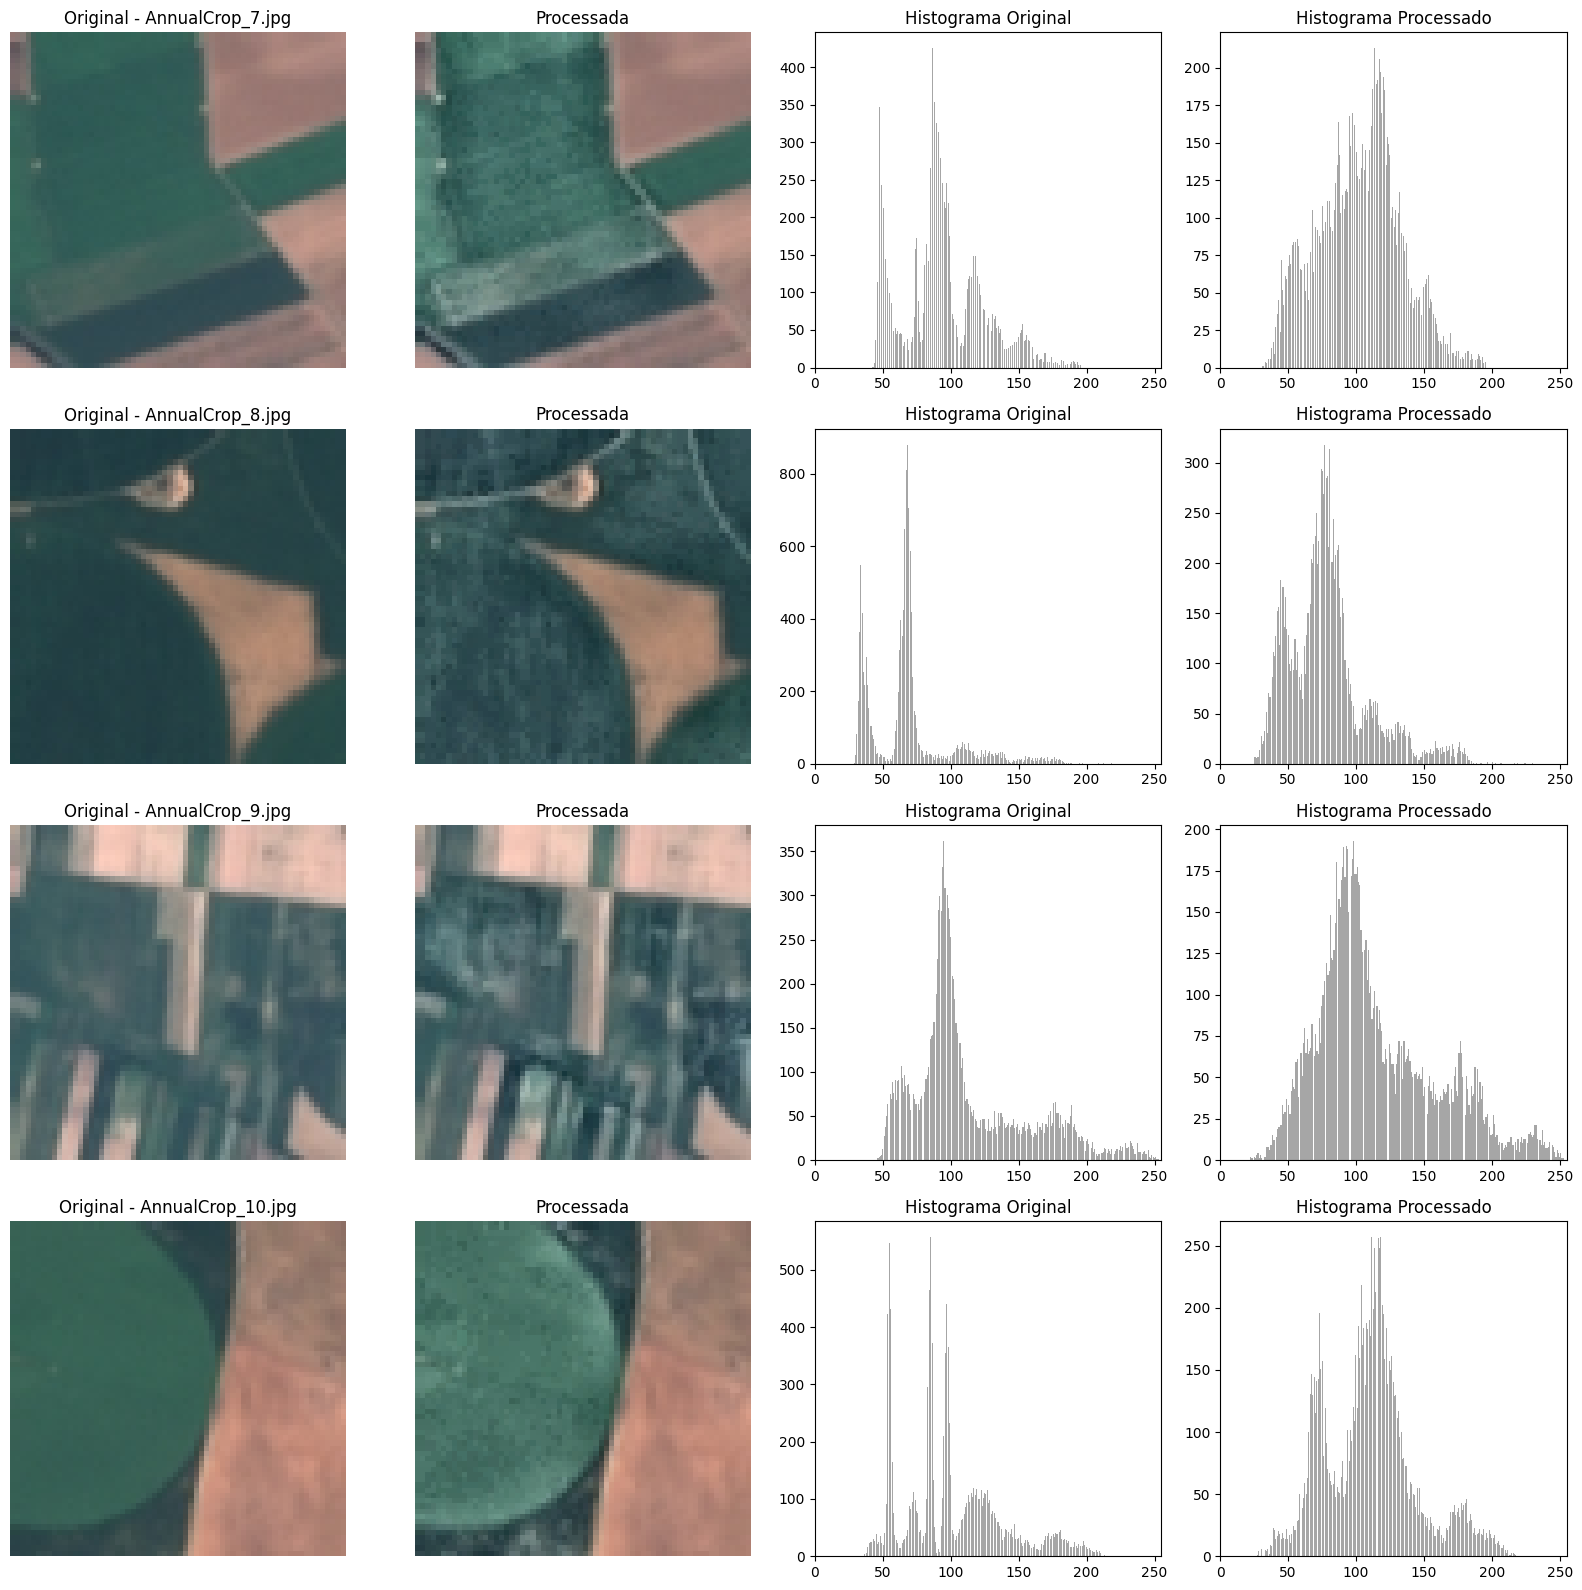

In [35]:
image_files = ['AnnualCrop_7.jpg', 'AnnualCrop_8.jpg', 'AnnualCrop_9.jpg', 'AnnualCrop_10.jpg']
hsv_low = np.array([25, 40, 40])
hsv_high = np.array([100, 255, 255])

# Armazenar resultados para plotagem posterior
results = []

for file in image_files:
    img = cv2.imread(file)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(hsv, hsv_low, hsv_high)
    kernel = np.ones((7,7), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.GaussianBlur(mask.astype(np.float32), (15,15), 0)
    
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    l_clahe = clahe.apply(l)
    lab_clahe = cv2.merge((l_clahe, a, b))
    enhanced = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)
    
    mask_normalized = mask[..., np.newaxis]/255.0
    result = (img * (1 - mask_normalized) + enhanced * mask_normalized).astype(np.uint8)
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    
    # Armazenar os dados para plotagem
    results.append((file, rgb, result_rgb))

# Criar grid final com 4 colunas por imagem
fig, axes = plt.subplots(nrows=len(results), ncols=4, figsize=(16, 4 * len(results)))

for i, (file, orig, proc) in enumerate(results):
    # Original
    axes[i,0].imshow(orig)
    axes[i,0].set_title(f'Original - {file}')
    axes[i,0].axis('off')
    
    # Processada
    axes[i,1].imshow(proc)
    axes[i,1].set_title('Processada')
    axes[i,1].axis('off')
    
    # Histograma original
    axes[i,2].hist(orig.ravel(), bins=256, color='gray', alpha=0.7)
    axes[i,2].set_title('Histograma Original')
    axes[i,2].set_xlim([0, 255])
    
    # Histograma processado
    axes[i,3].hist(proc.ravel(), bins=256, color='gray', alpha=0.7)
    axes[i,3].set_title('Histograma Processado')
    axes[i,3].set_xlim([0, 255])

plt.tight_layout()
plt.savefig("todas_imagens_grid.png")
plt.show()